In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("MachineLearningReady.csv",index_col=0)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns=["IS_SUCCESSFUL"])
y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [3]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [4]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
# create the model performance dataframe
performance = pd.DataFrame(columns = ["h1_nodes","h2_nodes","hidden_func_1","hidden_func_2","output_func","loss","accuracy"])

In [7]:
# Test Multiple configurations
number_input_features = len(X_train.iloc[0])
node_counts_1 = [12,24,36]
node_counts_2 = [12,24,36]
functions = ["relu"]
attempts = 10

# Test all combinations
for nodes_1 in node_counts_1:
    for nodes_2 in node_counts_2:
        for hidden_func_1 in functions:
            for _ in range(attempts):
                print(f"Testing {nodes_1} in h.1, {nodes_2} in h.2, with {hidden_func_1} as the activation function")
                # init the network
                nn = tf.keras.models.Sequential()

                # First hidden layer
                nn.add(
                    tf.keras.layers.Dense(units=nodes_1, input_dim=number_input_features, activation=hidden_func_1)
                )

                # Second hidden layer
                nn.add(tf.keras.layers.Dense(units=nodes_2, activation="relu"))

                # Output layer
                nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

                # Compile the model
                nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


                # Train the model
                fit_model = nn.fit(X_train,y_train,epochs=100,verbose=0)

                # Evaluate the model using the test data
                model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

                # Record the success of the model
                performance = performance.append({"h1_nodes" : nodes_1,
                                                  "h2_nodes" : nodes_2,
                                                  "hidden_func_1" : hidden_func_1,
                                                  "hidden_func_2" : "relu",
                                                  "output_func" : "sigmoid",
                                                  "Loss" : model_loss,
                                                  "accuracy" :model_accuracy},ignore_index=True)
                if model_accuracy >= max(performance["accuracy"]) : 
                    nn.save("Top_performing.h5")
performance.to_csv("Model_Performance_100epoch.csv")

Testing 12 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 1.2093 - accuracy: 0.3459 - 312ms/epoch - 1ms/step
Testing 12 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.8587 - accuracy: 0.5867 - 304ms/epoch - 1ms/step
Testing 12 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.7079 - accuracy: 0.6378 - 292ms/epoch - 1ms/step
Testing 12 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 1.6249 - accuracy: 0.7088 - 299ms/epoch - 1ms/step
Testing 12 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.6878 - accuracy: 0.5228 - 308ms/epoch - 1ms/step
Testing 12 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 1.2219 - accuracy: 0.5401 - 305ms/epoch - 1ms/step
Testing 12 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.6458 - accuracy: 0.6779 - 390ms/epoch - 1ms/step
Testing 12 in h.1, 12 in h.

Testing 24 in h.1, 36 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.8353 - accuracy: 0.5023 - 309ms/epoch - 1ms/step
Testing 36 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.9757 - accuracy: 0.6987 - 382ms/epoch - 1ms/step
Testing 36 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.7603 - accuracy: 0.6957 - 340ms/epoch - 1ms/step
Testing 36 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.7388 - accuracy: 0.7026 - 359ms/epoch - 1ms/step
Testing 36 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 1.0240 - accuracy: 0.6927 - 263ms/epoch - 981us/step
Testing 36 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 0.6594 - accuracy: 0.6316 - 432ms/epoch - 2ms/step
Testing 36 in h.1, 12 in h.2, with relu as the activation function
268/268 - 0s - loss: 1.1897 - accuracy: 0.6854 - 376ms/epoch - 1ms/step
Testing 36 in h.1, 12 in 

<AxesSubplot:xlabel='h1_nodes'>

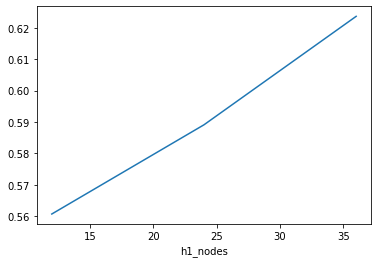

In [8]:
# Performance by h1 nodes
performance.groupby("h1_nodes")["accuracy"].mean().plot()

<AxesSubplot:xlabel='h2_nodes'>

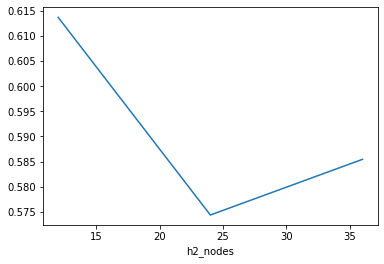

In [9]:
# Performance by h2 nodes
performance.groupby("h2_nodes")["accuracy"].mean().plot()

In [10]:
print(f"The maximum accuracy was {performance['accuracy'].max()}")
print(f"The minimum loss was {performance['Loss'].min()}")

The maximum accuracy was 0.7088046669960022
The minimum loss was 0.6104637384414673


In [11]:
performance.groupby("hidden_func_2").mean()

,loss,accuracy,Loss
hidden_func_2,,,
relu,NaN,0.591176,0.882122


In [ ]:
performance

In [ ]:
performance.sort_values(by="accuracy")